![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 5: Support Vector Machines EXERCISES

### Filipa Peleja <filipa.peleja@bts.tech>
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech>

## Classical Data Analysis (16-02-2021)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/master/Session_5/Session_5_Classical_Data_Analysis_SVM_EXERCISES.ipynb)





## Exercise one [NO CODE]



1.   What is a support vector?

 - The hyperplane in a 2-D data representation for example is the line that most accurately separates two classes. The support vectors are the lines on either side of this hyperplane, which run parallel to the hyperplane and also through the closest variable to the hyperplane from each class.

 - The support vectors are the samples located on the "edge of the street".
 - The are the closest samples to the decision boundary and they are those that support the decision boundary.

2.   Why it is important to scale inputs when using the SVM?

 - Because SVM is scale sensitive, meaning that its performance is directly affected by the normalization of the dataset. Greater ranges between each of the data points and differences in scale of the features will hamper an SVM as it won't have a great bearing on the support vectors that it relies upon for accuracy

 - Also, SVMS consume a lot of computational power and take much longer to train than many other standard machine learning algorithms. For example, in the mnist dataset each pixel in each image ranges from 0 - 255. If we normalize the data between 0 - 1 by dividing by 255 problem becomes less computationally heavy and thus takes less time.


3. Should you use dual=True or dual=False when training a model with millions of samples but hundreds of features?

  - In a LinearSVC we may use polynomial expansion, where we can end up with Samples < Features or Samples > Features.

  - When samples > features we should always set dual=false.
  - In SkLearn dual=True by default.




## Exercise two [NECESSARY]

Train a SVM classifier on the datasets shown in class (not the regression one). Take special care with the hyperparameters for multiclassification, C and other hyperparameters that we discussed. You may want to tune the hyperparameters using smaller validation sets to speed up the process. What accuracy can you reach?

In this exercise you need to:

- Visualize and present the dataset
- Apply the SVC to perform binary classification
- Comment on the usage of the different kernels and the effect of the hyper-parameters (is always needed a nonlinear kernel?)
- Visualize the results with a confusion matrix
- Compute the accuracy score and comment on the results
- Perform any other experiments that you can think of, always reason about the results!

# Mnist: Image Classification 

In [ ]:
# SVM is used with SKlearn
from sklearn.svm import SVC 
from datetime import datetime

In [ ]:
from keras.datasets import mnist

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("train_x", train_x.shape)
print("train_y", train_y.shape)
print("test_x", test_x.shape)
print("test_y", test_y.shape)

train_x (60000, 28, 28)
train_y (60000,)
test_x (10000, 28, 28)
test_y (10000,)


Text(0.5, 1.0, 'Digit 5')

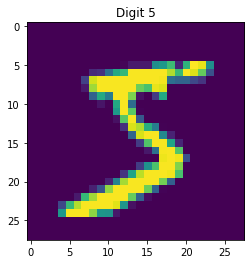

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_x[0])
plt.title("Digit " + str(train_y[0]))

In [ ]:
# We can inspect the image as an array of numbers 

train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# Remember before using SVC's we always need to normalize our data

num_pixels = train_x.shape[1] * train_x.shape[2]
num_pixels

784

In [ ]:
train_x_reshaped = train_x.reshape(train_x.shape[0], num_pixels).astype('float32')
test_x_reshaped = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')

print("train_x_reshaped",  train_x_reshaped.shape)
print("test_x_reshaped", test_x_reshaped.shape)

train_x_reshaped (60000, 784)
test_x_reshaped (10000, 784)


In [ ]:
# Now we must normalize our data as we always need to normalize the inputs of an SVM

train_x_normalized = train_x_reshaped/255
test_x_normalized = test_x_reshaped/255


In [ ]:
# Lets visualize our normalized values to ensure that they are between 0 - 1

train_x_normalized[0][150:300]


array([0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333336, 0.6862745 , 0.10196079,
       0.6509804 , 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11764706, 0.14117648, 0.36862746, 0.6039216 ,
       0.6666667 , 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.88235295, 0.6745098 , 0.99215686, 0.9490196 ,
       0.7647059 , 0.2509804 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19215687, 0.93333334,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.9843137 , 0.3647059 ,
       0.32156864, 0.32156864, 0.21960784, 0.15294118, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# We can also use Sklearns standard scalar getting a mean=0, variance=1

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

train_x_meanvar = scalar.fit_transform(train_x_reshaped)
test_x_meanvar = scalar.transform(test_x_reshaped)

In [ ]:
# Again, lets visualize the image pixel vales in an array

train_x_meanvar[0][100:300]

array([-2.62596905e-01, -2.47855902e-01, -2.21947014e-01, -1.87211409e-01,
       -1.47640124e-01, -1.08164363e-01, -7.68121183e-02, -4.70752977e-02,
       -3.02019659e-02, -1.52412439e-02, -5.28371939e-03,  0.00000000e+00,
        0.00000000e+00, -4.08251677e-03, -7.76342256e-03, -1.48932543e-02,
       -2.39627510e-02, -5.03408983e-02, -7.87674636e-02, -1.16181545e-01,
       -1.61247566e-01, -2.11961627e-01, -2.66898721e-01, -3.25678021e-01,
       -3.90241563e-01, -4.52076375e-01, -4.99397993e-01, -5.23428321e-01,
       -5.17618895e-01, -4.80902404e-01, -4.23079699e-01, -3.56740385e-01,
       -2.83683658e-01, -2.16836661e-01, -1.58524379e-01, -1.08784594e-01,
       -7.09225312e-02, -3.89534794e-02, -1.42523851e-02, -5.77049796e-03,
        0.00000000e+00,  0.00000000e+00, -1.19017400e-02, -2.20501553e-02,
       -5.18380739e-02, -9.06597003e-02, -1.39667109e-01, -1.97082117e-01,
       -2.64384717e-01, -3.40730429e-01, -4.22535747e-01, -5.15408635e-01,
       -5.84660351e-01, -

In [ ]:
# Now lets fit the SVC to our normalized data

model = SVC()

In [ ]:
# model training 

t0 = datetime.now()

model.fit(train_x_meanvar, train_y) 
print("Train Duration", datetime.now()-t0)

Train Duration 0:13:47.643645


In [ ]:
# predicting with test x to check the accuracy

y_pred = model.predict(test_x_meanvar)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(test_y, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_y, y_pred))



Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted

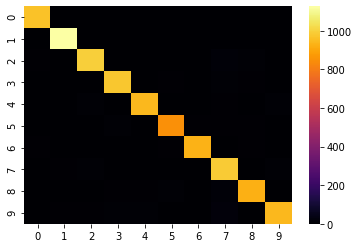

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix(test_y, y_pred), cmap=plt.cm.inferno)
plt.show()

In [ ]:
# Model score returns the models accraucy

t0 = datetime.now()

print("Train Score", model.score(train_x_normalized, train_y), "Duration: ", dateime.now()-t0)

In [ ]:
t0 = datetime.now()

print("Test Score", model.score(test_x_normalized, test_y), "Duration: ", dateime.now()-t0)

# Spam: Binary Classificaiton

In [1]:
!wget "https://github.com/vfp1/bts-mbds-classical-data-analysis-2019/raw/master/05_SVM/data/spam.csv"

--2021-02-19 11:01:37--  https://github.com/vfp1/bts-mbds-classical-data-analysis-2019/raw/master/05_SVM/data/spam.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-mbds-classical-data-analysis-2019/master/05_SVM/data/spam.csv [following]
--2021-02-19 11:01:37--  https://raw.githubusercontent.com/vfp1/bts-mbds-classical-data-analysis-2019/master/05_SVM/data/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2021-02-19 11:01:37 (11.2 MB/s) - ‘spam.csv

In [2]:
import pandas as pd

df_spam = pd.read_csv('https://github.com/vfp1/bts-mbds-classical-data-analysis-2019/raw/master/05_SVM/data/spam.csv', encoding='ISO-8859-1')
df_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df_spam = df_spam.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_spam.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
df_spam.columns = ["labels", "data"]
df_spam.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Lets create a column for binary labels

df_spam['binary_labels'] = df_spam['labels'].map({"ham":0, "spam":1})
df_spam.head()

,labels,data,binary_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
# Lets create a Y matrix by extracting our Numpy array

"""
We don't really need to do this as sklearn accepts strings and series as labels,
however, it is good practice to have a nuermical representation of the data
if we want to build our own outside of Sklearn
"""

Y = df_spam["binary_labels"].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
# Now we need only have text in our data column so we need to vectorize it
# We can do this using tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(decode_error="ignore")

x_tfidf = tf_idf.fit_transform(df_spam["data"])



In [29]:
from sklearn.model_selection import train_test_split

x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, Y, test_size=0.20, random_state=42)

In [30]:
print("x_train_tfidf", x_train_tfidf.shape)
print("x_test_tfidf", x_test_tfidf.shape)
print("y_train_tfidf", y_train_tfidf.shape)
print("y_test_tfidf", y_test_tfidf.shape)

x_train_tfidf (4457, 8672)
x_test_tfidf (1115, 8672)
y_train_tfidf (4457,)
y_test_tfidf (1115,)


In [36]:
# Now that we have prepared the data and done our train_test_split we can fit the SVC
# Since this is a binary classification problem and linear classifier/kernal should work well so I will try this first
# With a C = 2 wont be so strict and allow violations to our model as in a spam dataset there is likely to be outliers, tus, I think there we would attain a
# better separation line with less strict model


"""
C refers to the amount of violations we will allow to our margin, the greater C, the stricter we will be in allowing violations to the margin.
The strength of the regularization is inversely proportional to C. Must be strictly positive.e The penalty is a squared l2 penalty.
"""

from sklearn.svm import SVC

svc = SVC(kernel="linear", C=2)

In [37]:
# Fit the svc

model = svc.fit(x_train_tfidf, y_train_tfidf)

In [38]:
# Predict with our model

y_pred = svc.predict(x_test_tfidf)

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test_tfidf, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test_tfidf, y_pred))

Classification report for classifier SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion matrix:
[[962   3]
 [ 21 129]]


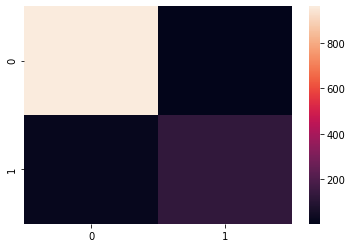

In [40]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test_tfidf, y_pred))

In [47]:
# Once again our model score reflects the accuracy of the SVC
from datetime import datetime

t0 = datetime.now()

print("Train Score: ",model.score(x_train_tfidf, y_train_tfidf)) # "Duration: " datetime.now() - t0)


Train Score:  0.9993269015032533


In [45]:
t0 = datetime.now()

print("Test Score: ", model.score(x_test_tfidf, y_test_tfidf), "Duration: ", datetime.now()-t0)

# We can see the the SVC linear kernal is doing a great job at separating the spam and non-spam emails in this binary classificaiton proble,

Test Score:  0.97847533632287 Duration:  0:00:00.183800


In [49]:
import sklearn
sklearn.__version__

'0.22.2.post1'

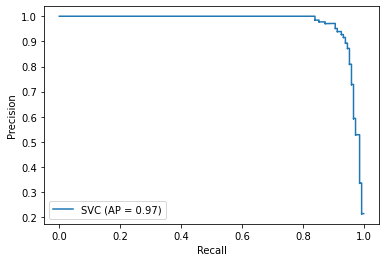

In [51]:
# Lets plot the precision recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, x_test_tfidf, y_test_tfidf)


# Breast Cancer Detection

In [53]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [58]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [54]:
data.data.shape

(569, 30)

In [60]:
# Again, we have a binary classification problem, so first I would try a linear kernal svc
# Not a radial kernal which was used in the lectures, no need to add unncessary complexity to our model

data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [64]:
pd.DataFrame(data.data).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [67]:
x = data.data
y = data.target

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [69]:
# Now as per usual with SVMs we have to standardize our data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
# Now we can fit the svc
# since, this is a binary classification problem I will first try with a linear model
# since, we are detecting cancer we need to have a very high recall of accuracy, therefore, I am going to be strict and in terms of margin violations

svc = SVC(kernel="linear", C=300)

model = svc.fit(x_train_scaled, y_train)

In [71]:
# predictions

y_pred = model.predict(x_test_scaled)

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))



Classification report for classifier SVC(C=300, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114


Confusion matrix:
[[42  1]
 [ 6 65]]


The model above looks quite accurate, lets run it again with a low C hyperparameter and compare the results

In [73]:
svc = SVC(kernel="linear", C=2)

model = svc.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)


print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

# With a lower C value it appears we are getting greater precision, recall, and accuracy
# Less missclassifications when we look at the confusion matrix

Classification report for classifier SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion matrix:
[[41  2]
 [ 3 68]]


Lets run the model again with the radial kernal for different vaules of C

In [74]:
svc = SVC(kernel="rbf", C=2)

model = svc.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)


print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report for classifier SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion matrix:
[[41  2]
 [ 0 71]]


In [75]:
svc = SVC(kernel="rbf", C=200)

model = svc.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)


print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report for classifier SVC(C=200, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114


Confusion matrix:
[[41  2]
 [ 5 66]]


In this case adding more complexity to our model appears to be worthwhile. The model using the radial kernal and a low c value C = 2 has resulted in just two False Postives, and no False Negatives.

This is our best model. Especially, since it has product 0 False negatives which is of utmost importance in a situation where we are trying to detect cancer.

# Concrete Regression


In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

In [76]:
import pandas as pd

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [79]:
df.columns = (["cement", "bf_slag", "fly_ash", "water", "superplasticizer", "coarse_aggregate", "fine_aggregate", "age", "compressive_strgth"])
df.head()

,cement,bf_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strgth
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [89]:
x = df.loc[: , :'age'].values
y = df['compressive_strgth'].values

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


In [91]:
# Standardize that data as per usual

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [94]:
# As this is a regression problem we also need to standardize the y values in the same manner 
# For the target, the model expects 2D array and target is 1D, therefor we need to reshape the target arrays

target_scaler = StandardScaler()
y_train_std = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_std = target_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [96]:
y_test_std.shape

(206,)

This is a regression problem. Not a classification problem.

Therefor, we will use the **SVR** which is the SVM that Sklearn uses for regression. We will use different kernels and see how rbf is actually the best one that we can apply

In [100]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=2)

model = svr.fit(x_train_std, y_train_std)

print("Train Score: ", model.score(x_train_std, y_train_std))
print("Test Score: ", model.score(x_test_std, y_test_std))

# Here the model accuracy is quite poor with the linear kernel

Train Score:  0.5692251770560239
Test Score:  0.5386520356799473


In [101]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=200)

model = svr.fit(x_train_std, y_train_std)

print("Train Score: ", model.score(x_train_std, y_train_std))
print("Test Score: ", model.score(x_test_std, y_test_std))

# No any significant change if you increase C

Train Score:  0.5691461927373513
Test Score:  0.5384549650037694


In [102]:
# Lets use poly

from sklearn.svm import SVR

svr = SVR(kernel='poly',degree=3, C=2)

model = svr.fit(x_train_std, y_train_std)

print("Train Score: ", model.score(x_train_std, y_train_std))
print("Test Score: ", model.score(x_test_std, y_test_std))

# Accuracy is much better

Train Score:  0.7636309832852766
Test Score:  0.6931964997797734


In [107]:
# Lets increase the degree of the ploynomial

from sklearn.svm import SVR

svr = SVR(kernel='poly',degree=7, C=2)

model = svr.fit(x_train_std, y_train_std)

print("Train Score: ", model.score(x_train_std, y_train_std))
print("Test Score: ", model.score(x_test_std, y_test_std))

# This is leading to very poor results... I am not sure why, it looks like it may be due to overfitting ...

Train Score:  0.7056548212241165
Test Score:  -4.353803322332087


In [110]:
# Lets try another poly with a higher C

from sklearn.svm import SVR

svr = SVR(kernel='poly',degree=3, C=200)

model = svr.fit(x_train_std, y_train_std)

print("Train Score: ", model.score(x_train_std, y_train_std))
print("Test Score: ", model.score(x_test_std, y_test_std))

# Accuracy is better again

Train Score:  0.8022341028139839
Test Score:  0.7208180465193031


In [111]:
# Now lets try rbf

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=2)

model = svr.fit(x_train_std, y_train_std)

print("Train Score: ", model.score(x_train_std, y_train_std))
print("Test Score: ", model.score(x_test_std, y_test_std))

# Accuracy is better again

Train Score:  0.9083260174519389
Test Score:  0.8545523514842992


In [112]:
# Now lets try rbf

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=200)

model = svr.fit(x_train_std, y_train_std)

print("Train Score: ", model.score(x_train_std, y_train_std))
print("Test Score: ", model.score(x_test_std, y_test_std))

# Accuracy is best!!!

Train Score:  0.9733627228525505
Test Score:  0.8765877482767301


## Exercise three [OPTIONAL]

*Try to solve this as an optional assignement, we will review the code in the following class*

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms. In this exercise, we will develop the intuition behind support vector machines and their use in classification problems.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To begin with, let us generate the data for a linear classification problem. In order to do so use the `make_blobs` function from `sklearn`. We want to generate 50 samples, set the `random_state=0` and `cluster_std=0.6`. Finally plot the points with `plt.scatter`

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. Think about a line that separates the two classes, how many are there? Which do you think would be the more appropiate given the data points? Draw some lines over this plot with slopes [1, 0.5, -0.2] and biases [0.65, 1.6, 2.9]. Use the `np.linespace` function to generate the x and the line equation 

$$y = mx + b$$

for the y. Finally plot a "new point" in the coordinates (0.6, 2.1) with a red X.

## SVM margins and support vectors
These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!.

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a line between the classes, we can draw around each line a margin of some width, up to the nearest point (no matter the class). To visualize this, let us repeat the same plot but adding some code to fill the margins. Use the method `plt.fill_between` with `color='#AAAAAA'`. The margins for each of the lines above are [0.33, 0.55, 0.2].

Now fit an SVM to this data. Use Scikit-Learn's support vector classifier to train an SVM model. For the time being, we will use a linear kernel and set the C parameter to a very large number like 1E10. 



Now retrieve the support vectors from the learned model. Would you be able to identify them on the plot? Why are these the support vectors? Why are they important?

This function will plot the decision boundaries of a model and the support vectors. 

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',
                   edgecolors='blue')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Generate a scatter plot of the data set and use the previous function to draw the support vectors and the decision boundaries 

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

In order to see an example of this, simulate the points with the same random seed, but now simulate 120. Then train again the SVM and plot the decision boundaries. Which are the support vectors this time? Is this an expected result? Why?

## SVM softening the margins
Now add a new point which is inside the decision boundary, say (-0.5, 2) to class 0, what do you expect will happen?

How about adding an even more outlier, like (0, 0) to class 0.

What happened to the margin? Could we use this model if we had a red point further right? Why?

Now, is there a way that we could try to make the SVM more robust to these possible outliers? Which one? Try to implement an SVM model with the same data modifying the C parameter. What do you observe?

## SVM Kernels
Now we have seen that SVM are very useful to find the optimal separating hyper-plane when your data is linearly separable. Even when you have some noise in the data set, you can tune the C-value to be able to adjust this. But what happens if your classes are not linearly separable? Is there a way we could overcome this draw-back? Let us generate a dataset that is not linearly separable. Use the `make_circles` method from `samples_generator` in sklearn. Generate 100 examples with `factor=.1, noise=.1, random_state=0`. Then generate a scatter plot to visualize the samples, use a different color for each class.

Now try to classify this data with a linear SVM, what do you expect will happen? Does this model capture the pattern of the classes? Plot the classification results with the `plot_svc_decision_function`

What could we do in order to make this dataset linearly separable? We can project it into a higher dimensional space. Note the similarity between this, and the polynomial regression. In order to have a better understanding of how kernels work, first implement a third axis with python with the following expression:

$$x_3 = e^{-(x_1^2 + x_2^2)}$$

Actually this is somewhat equivalent to the rbf kernel. You should name the new axis `x_3`

Once you have implemented this 3rd axis, you may 

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], x_3, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('x_3')
    
interact(plot_3D, elev=[30, 0, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

Now use the SVM classifier but set the `kernel='rbf'` with high value for C and plot the results

## Evaluating the classification results
In order to assess the goodness of our model we need to compute some quantitative scores, we will review some of the most relevant. First, use the function `make_blobs` to generate a multilabel dataset. Generate 200 samples with 4 different classes set `random_state=0` and `cluster_std=0.6` 

Split the data set in training and test and apply the SVC with `C=1, kernel='rbf', gamma='auto', class_weight='balanced', decision_function_shape='ovr'` 

Predict on the test set and plot the confusion matrix, use the `confusion_matrix` function from sklearn and `heatmap` from seaborn. What would be the confusion matrix result of a perfect classification? What information can we extract from it?

Finally compute the accuracy score, what does this value mean?

You can use the follwing code to visualize the decision function computed by the model. 

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

X0, X1 = Xtest[:, 0], Xtest[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(svc, xx, yy,
               cmap='jet', alpha=0.6)

plt.scatter(X0, X1, c=ytest, cmap='jet', s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Now repeat the computations with a linear kernel, what changes do you observe? Now change the `cluster_std` when you generate the data, what would you expecte when you increase it? and when you decrease it? 